In [3]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
from matplotlib import pyplot as plt

In [9]:
import seaborn as sns

In [11]:
from scipy.stats import norm

In [15]:
df = pd.read_csv("statkom2/Titanic-Dataset.csv")

In [35]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [37]:
print(df[['Age', 'Fare']].isnull().sum())

Age     177
Fare      0
dtype: int64


In [39]:
missing_age = df['Age'].isnull().sum()
print(f"Jumlah missing values di 'Age': {missing_age}")


Jumlah missing values di 'Age': 177


In [48]:
missing_data = df[df[['Age', 'Fare']].isnull().any(axis=1)]
print(missing_data)


     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

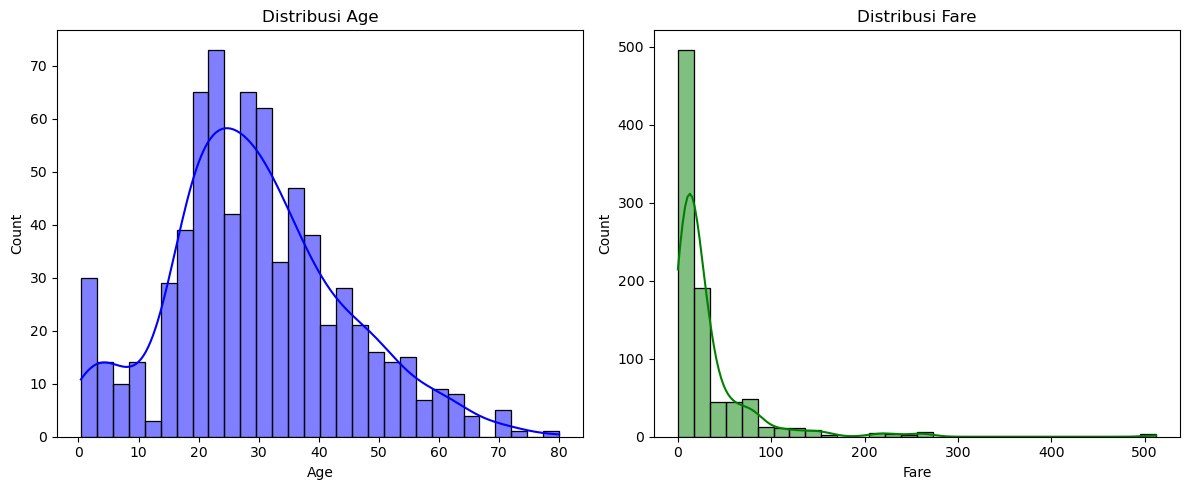

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
#"Age"
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribusi Age')

# "Fare"
sns.histplot(df['Fare'].dropna(), bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribusi Fare')

plt.tight_layout()
plt.show()


In [62]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [64]:
print(df['Age'].isna().sum())

0


In [66]:
median_age = df['Age'].median()
print("Median Age:", median_age)

Median Age: 29.69911764705882


In [68]:
print(df[df['Ticket'] == '330877'])


   PassengerId  Survived  Pclass              Name   Sex        Age  SibSp  \
5            6         0       3  Moran, Mr. James  male  29.699118      0   

   Parch  Ticket    Fare Cabin Embarked  
5      0  330877  8.4583   NaN        Q  


In [72]:
df = pd.read_csv("statkom2/Titanic-Dataset.csv")  

In [74]:
print(df[['Age', 'Fare']].isnull().sum())

Age     177
Fare      0
dtype: int64


In [76]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [78]:
print(df['Age'].isna().sum())

0


In [80]:
print(df[df['Ticket'] == '330877'])

   PassengerId  Survived  Pclass              Name   Sex        Age  SibSp  \
5            6         0       3  Moran, Mr. James  male  29.699118      0   

   Parch  Ticket    Fare Cabin Embarked  
5      0  330877  8.4583   NaN        Q  


In [84]:
mean_age = df['Age'].mean() 
median_age = df['Age'].median()
print("Mean Age:", mean_age)
print("Median Age:", median_age)

Mean Age: 29.69911764705882
Median Age: 29.69911764705882


In [86]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

# Z-score
df['Age_Zscore'] = (df['Age'] - mean_age) / std_age

print(df[['Age', 'Age_Zscore']].head())

    Age  Age_Zscore
0  22.0   -0.592148
1  38.0    0.638430
2  26.0   -0.284503
3  35.0    0.407697
4  35.0    0.407697


In [92]:
outliers = df[(df['Age_Zscore'] > 3) | (df['Age_Zscore'] < -3)]
num_outliers = outliers.shape[0] 

print(f"Jumlah outlier pada 'Age' dengan Z-score > 3 atau < -3: {num_outliers}")

print(outliers[['Age', 'Age_Zscore']])

Jumlah outlier pada 'Age' dengan Z-score > 3 atau < -3: 7
      Age  Age_Zscore
96   71.0    3.176499
116  70.5    3.138043
493  71.0    3.176499
630  80.0    3.868699
672  70.0    3.099587
745  70.0    3.099587
851  74.0    3.407232


In [94]:
z_20 = (20 - mean_age) / std_age
prob_age_less_20 = norm.cdf(z_20)
print(f"Probabilitas Age < 20: {prob_age_less_20:.4f}")

Probabilitas Age < 20: 0.2278
